# Uploading the dataset

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download vanshk076/railway-defect-dataset -p /content/data

Dataset URL: https://www.kaggle.com/datasets/vanshk076/railway-defect-dataset
License(s): unknown
100% 3.43G/3.44G [00:33<00:00, 257MB/s]
100% 3.44G/3.44G [00:33<00:00, 111MB/s]


In [ ]:
  !unzip /content/data/railway-defect-dataset.zip -d /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/class 3/defective/1.MOV_20201221091849_8193.JPEG  
  inflating: /content/class 3/defective/1.MOV_20201221091849_8194-GI6khr.JPEG  
  inflating: /content/class 3/defective/1.MOV_20201221091849_8194.JPEG  
  inflating: /content/class 3/defective/1.MOV_20201221091849_8387-49TCA6.JPEG  
  inflating: /content/class 3/defective/1.MOV_20201221091849_8387.JPEG  
  inflating: /content/class 3/defective/1.MOV_20201221091849_8388.JPEG  
  inflating: /content/class 3/defective/1.MOV_20201221091849_8389.JPEG  
  inflating: /content/class 3/defective/1.MOV_20201221091849_8390.JPEG  
  inflating: /content/class 3/defective/1.MOV_20201221091849_8391.JPEG  
  inflating: /content/class 3/defective/1.MOV_20201221091849_8392.JPEG  
  inflating: /content/class 3/defective/1.MOV_20201221091849_8393.JPEG  
  inflating: /content/class 3/defective/1.MOV_20201221091849_8394.JPEG  
  inflating: /content/class 3/defective/1.MOV_2020122109184

# Requirements

In [ ]:
import tensorflow as tf
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Input
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

# Data prepare

In [ ]:
data_dir="class 3"
image_ext=["jpeg","jpg","webp"]

In [ ]:
for image_class in os.listdir(data_dir):
     for image in os.listdir(os.path.join(data_dir, image_class)):
       image_path = os.path.join(data_dir, image_class, image)
       try:
         img = cv2.imread(image_path)
         # Use Pillow to get image format
         with Image.open(image_path) as im:
           tip = im.format.lower()
         if tip not in image_ext:
           print('Image not in ext list {}'.format(image_path))
           os.remove(image_path)
       except Exception as e:
         print('Issue with image {}'.format(image_path))

In [ ]:
data= len(os.listdir(os.path.join(data_dir,'defective')))
data

6031

In [ ]:
data=tf.keras.utils.image_dataset_from_directory('class 3',batch_size=50)

Found 6503 files belonging to 2 classes.


# Data preprocessing

In [ ]:
data=data.map(lambda x,y:(x/255,y))
scaled_iterator=data.as_numpy_iterator()
batch=scaled_iterator.next()
batch[0].max()

np.float32(1.0)

In [ ]:
batch=scaled_iterator.next()

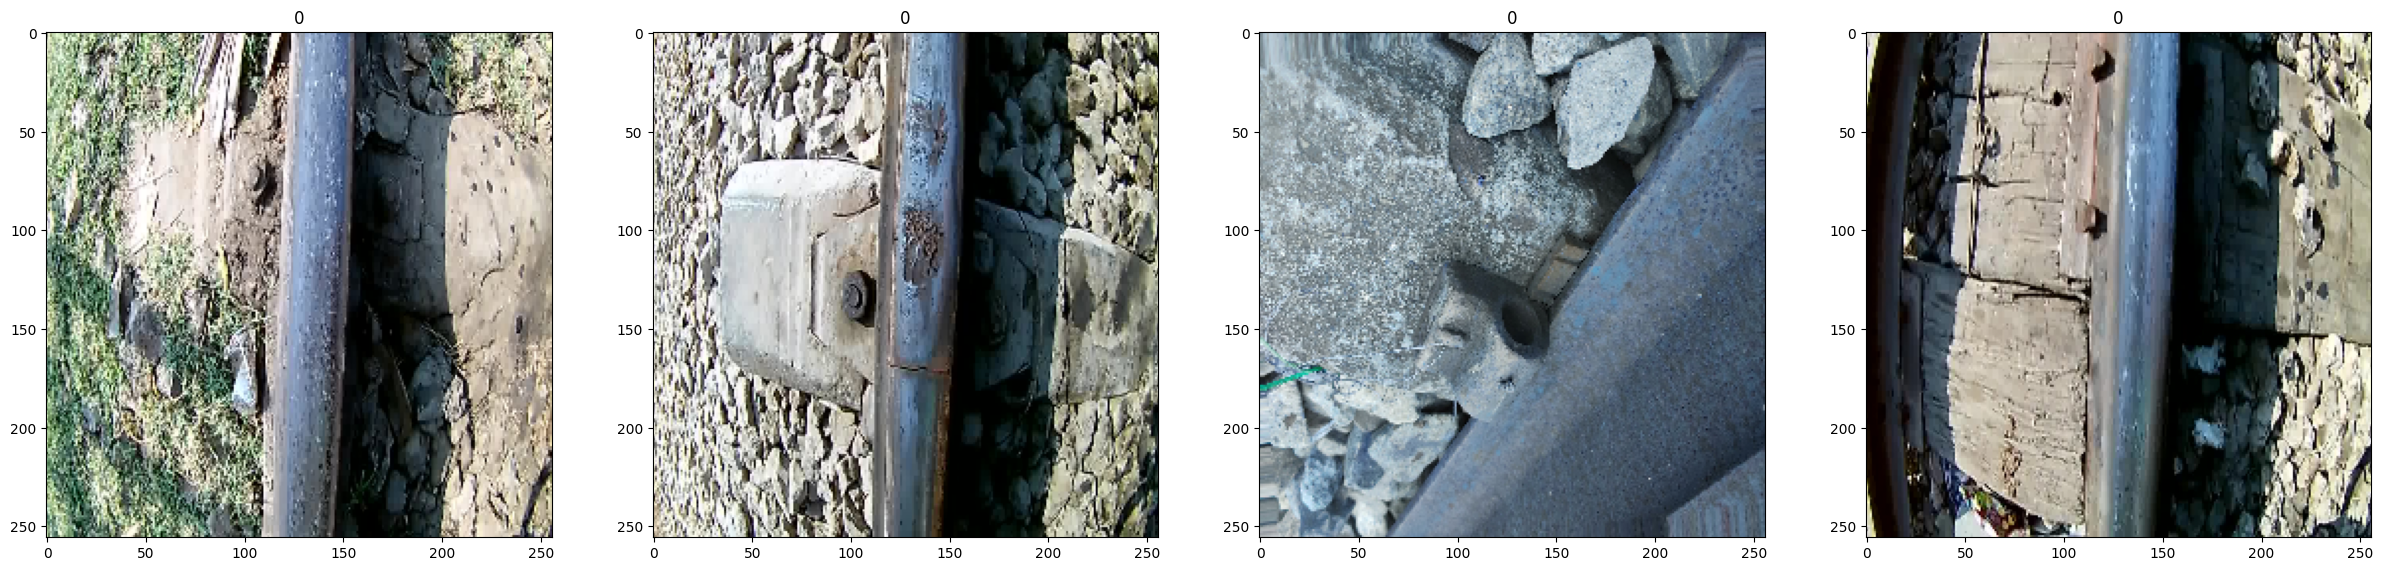

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(30,30))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
len(data)

131

In [ ]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1

In [ ]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Model Development

In [ ]:
model=Sequential()

In [ ]:
model.add(Input(shape=(256,256,3)))
model.add(Conv2D(16,(3,3),1,activation='relu'))# first convolution layer
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))#second convolution layer
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))#third convolution layer
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
logdir='logs'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9969 - loss: 0.0127 - val_accuracy: 0.9585 - val_loss: 0.1767
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.9974 - loss: 0.0093 - val_accuracy: 0.9577 - val_loss: 0.2079
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9999 - loss: 0.0019 - val_accuracy: 0.9623 - val_loss: 0.2018
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9998 - loss: 0.0019 - val_accuracy: 0.9608 - val_loss: 0.2199
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9662 - val_loss: 0.1770
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.9999 - loss: 0.0027 - val_accuracy: 0.9585 - val_loss: 0.1601
Epoch 7/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.9993 - loss: 0.0039 - val_accuracy: 0.9592 - val_loss: 0.3076
Epoch 8/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.9979 - loss: 0.0067 - val_accuracy: 0.9562 - v

# Model Evaluation

## Loss Evaluation

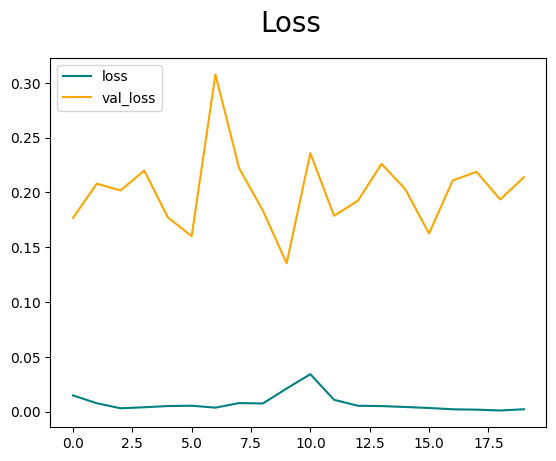

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Accuracy Evaluation

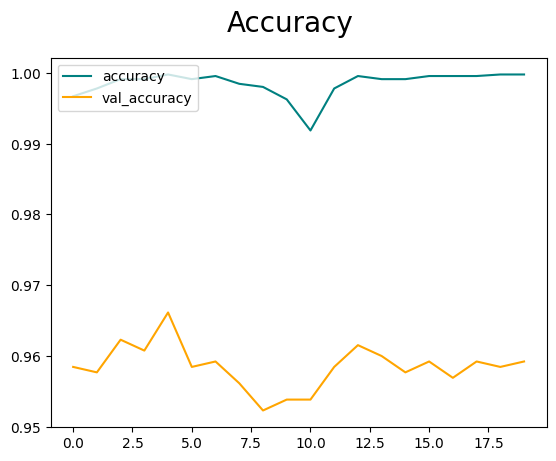

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.94736844, shape=(), dtype=float32) tf.Tensor(0.34615386, shape=(), dtype=float32) tf.Tensor(0.94640124, shape=(), dtype=float32)


# Saving Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','trackclassifier.h5'))